<a href="https://colab.research.google.com/github/GoldHood/IA_NN_Projects_Colab/blob/main/MVP_Placas_peru_Y11_10epoch_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Proyecto – Detección de Placas Vehiculares Peruanas con YOLOv11 🚗🔍

### Curso: Redes Neuronales y Aprendizaje Profundo  
**Ejercicio 2 – Examen Parcial 2025**

---

** Martin Karlo Verastegui Ponce  
** Maestría en Inteligencia Artificial  
** Universidad Nacional de Ingeniería (UNI)  

**Fecha:** 22 de mayo de 2025

---

# 🚗🔍 Detección de Placas Vehiculares Peruanas con YOLOv11 🎉

**Bienvenidos estudiantes!** 👩‍🎓👨‍🎓
En este notebook aprenderemos paso a paso a:

1. Crear y configurar un entorno de trabajo. 🛠️
2. Preparar y validar el dataset de placas peruanas. 📁
3. Entrenar un modelo YOLOv11 y ajustar hiperparámetros. 🎯
4. Evaluar métricas de desempeño: Precision, Recall, mAP. 📈
5. Realizar inferencias y visualizar resultados. 🖼️

> **Objetivo educativo:** Comprender en detalle cada línea de código y el proceso completo de detección de objetos con YOLOv11.

¡Comencemos este viaje de aprendizaje! 🚀🔔

## 📦 Importación de Librerías Fundamentales para YOLOv11 🚗🔍

Antes de iniciar con la detección de placas vehiculares peruanas, necesitamos importar un conjunto de librerías esenciales. Estas herramientas permitirán manipular datos, procesar imágenes, graficar resultados y validar la estructura del dataset.

Estas librerías son utilizadas a lo largo de todo el proyecto y están directamente relacionadas con el desarrollo del **Ejercicio 2: Detección de Placas Vehiculares Peruanas** del examen parcial. 🎓

---

### 🔹 `numpy` ➕  
**¿Qué es?**  
Librería especializada en cálculos numéricos y manipulación de matrices (arreglos multidimensionales).

**¿Cómo se usa aquí?**  
- Para trabajar con las coordenadas de las cajas de detección (bounding boxes).  
- Para normalizar datos y aplicar operaciones matemáticas sobre vectores de predicción.

---

### 🔹 `pandas` 📊  
**¿Qué es?**  
Librería para análisis y manipulación de datos en estructuras tabulares (como archivos `.csv`).

**¿Cómo se usa aquí?**  
- Leer y analizar el archivo `results.csv` que contiene las métricas del entrenamiento de YOLO (precisión, recall, mAP).  
- Visualizar resultados por época y facilitar el análisis de desempeño del modelo.

---

### 🔹 `os` 🗂️  
**¿Qué es?**  
Módulo de Python que permite interactuar con el sistema de archivos del computador.

**¿Cómo se usa aquí?**  
- Verificar si todas las imágenes tienen su correspondiente archivo de etiqueta (`.txt`).  
- Automatizar la revisión de carpetas (`train`, `valid`, `test`) y detectar inconsistencias.

---

### 🔹 `matplotlib.pyplot` 📈  
**¿Qué es?**  
Herramienta para crear gráficos estáticos e interactivos en Python.

**¿Cómo se usa aquí?**  
- Graficar la evolución de métricas como precisión y mAP durante el entrenamiento.  
- Visualizar el comportamiento del modelo para detectar problemas como overfitting o underfitting.

---

### 🔹 `PIL.Image` 🖼️  
**¿Qué es?**  
Librería del módulo PIL (Python Imaging Library) usada para cargar, mostrar y procesar imágenes.

**¿Cómo se usa aquí?**  
- Cargar y mostrar imágenes con placas detectadas por el modelo YOLO.  
- Validar visualmente si las predicciones del modelo son correctas.

---

## 🧠 Relación con el Ejercicio 2 del Examen Parcial

Estas librerías están directamente conectadas con los entregables solicitados:

| Elemento Evaluado 📋                             | ¿Qué librería ayuda?          | Función que cumple |
|--------------------------------------------------|-------------------------------|---------------------|
| Código fuente bien comentado                     | `numpy`, `os`, `pandas`       | Manipular datos y carpetas |
| Reporte de métricas y ejemplos de detección      | `pandas`, `matplotlib.pyplot` | Leer resultados y graficarlos |
| Visualización de detecciones                     | `PIL.Image`                   | Mostrar imágenes procesadas |
| Análisis de desempeño y validación del modelo    | `pandas`, `matplotlib`, `os`  | Evaluar el comportamiento del modelo |

---

Estas herramientas son la base del flujo de trabajo en todo proyecto de visión por computadora con YOLOv11. ¡ Al aprender a usarlas nos permite construir sistemas inteligentes con aplicaciones reales! 🚀🔍📸



In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

## 📥 Instalación de Librerías Adicionales para Manejo de Datos e Imágenes 🧩🔧

Durante el desarrollo del **Ejercicio 2: Detección de Placas Vehiculares Peruanas**, es necesario instalar algunas librerías adicionales que facilitan la organización del dataset, la manipulación de imágenes y el acceso a herramientas externas como Roboflow.

---

### 🧱 `split-folders`  
**¿Qué es?**  
Una herramienta para dividir automáticamente un conjunto de imágenes en carpetas de `train`, `val` y `test`.

**¿¿Por qué es útil aquí?**  
- Permite separar el dataset de manera balanceada sin necesidad de hacerlo manualmente.
- Evita errores de organización y asegura que YOLO encuentre las carpetas correctamente.

---

### 🖼️ `pillow`  
**¿Qué es?**  
Una biblioteca para trabajar con imágenes: abrir, modificar, redimensionar, convertir, etc.

**¿¿Por qué es útil aquí?**  
- Se utiliza para visualizar las imágenes procesadas.
- Es necesaria para funciones de `PIL.Image` dentro del notebook.

---

### 🧠 `ultralytics`  
**¿Qué es?**  
El paquete oficial que contiene las herramientas necesarias para trabajar con YOLOv8, YOLOv11, YOLOv12 y otros modelos de visión.

**¿¿Por qué es útil aquí?**  
- Es el corazón del proyecto. Nos permite entrenar, evaluar e inferir usando el modelo YOLO con comandos simples.
- Incluye soporte para visualizar métricas, cargar datasets y exportar resultados.

---

### ☁️ `roboflow`  
**¿Qué es?**  
Una plataforma online que permite organizar datasets, anotarlos y exportarlos en formatos compatibles con YOLO.

**¿¿Por qué es útil aquí?**  
- Usamos Roboflow para obtener el dataset de placas vehiculares ya anotado.
- Esta librería permite conectarte a tu cuenta Roboflow y descargar datasets directamente desde Python.

---

### 🔧 Comandos a ejecutar




In [2]:
!pip install split-folders pillow ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## ☁️ Conexión con Roboflow y Descarga del Dataset de Placas Peruanas 🇵🇪

Una de las grandes ventajas de trabajar con Roboflow es que podemos acceder a datasets personalizados directamente desde Python, sin necesidad de descargar archivos manualmente. Esto es especialmente útil para proyectos colaborativos, como el **Ejercicio 2** de detección de placas vehiculares peruanas. 🔍

---

### 📡 ¿Qué estamos haciendo aquí?

Con el siguiente bloque de código nos conectamos a **Roboflow**, accedemos al proyecto que contiene nuestro dataset anotado de placas peruanas, seleccionamos una versión específica y lo descargamos en formato compatible con **YOLOv11**.

---

### 🧬 Explicación paso a paso:

**1. `from roboflow import Roboflow`**  
→ Importa la clase principal para usar la API de Roboflow dentro de Python.

**2. `rf = Roboflow(api_key="TU_API_KEY")`**  
→ Nos conectamos a Roboflow usando una API key.  
🔐 En este caso, usamos una clave de acceso:  
`bWdjQu8RfOZOkj6aC55m`  
(esta clave debe mantenerse segura y no compartirse públicamente).

**3. `project = rf.workspace("grupo-6-placas").project("peru-plate-numbers")`**  
→ Aquí accedemos al **workspace** llamado `grupo-6-placas` y dentro de él, seleccionamos el proyecto que contiene nuestro dataset, llamado `peru-plate-numbers`.

**4. `version = project.version(3)`**  
→ Elegimos la versión número 3 del dataset. Roboflow permite tener múltiples versiones del mismo conjunto de datos, ideal para comparar mejoras.

**5. `dataset = version.download("yolov11")`**  
→ Descargamos el dataset en formato compatible con YOLOv11.  
Esto creará automáticamente una estructura de carpetas con `train`, `valid`, `test` y el archivo `data.yaml`.

---

### 📂 ¿Qué obtendremos al final?

Una carpeta llamada `Peru-Plate-Numbers-3` (o nombre similar), que contiene:

- 📁 `train/`, `valid/`, `test/`: subcarpetas con imágenes y etiquetas.
- 📄 `data.yaml`: archivo de configuración que enlaza con YOLOv11.

---

### ✅ Conclusión

Gracias a esta integración con Roboflow:

- ✅ No necesitas hacer descargas manuales.
- ✅ Obtienes datasets limpios y bien estructurados.
- ✅ Puedes actualizar versiones y mantener control de cambios fácilmente.

Este paso es clave para avanzar con confianza en la etapa de entrenamiento con YOLOv11. 🚀📸


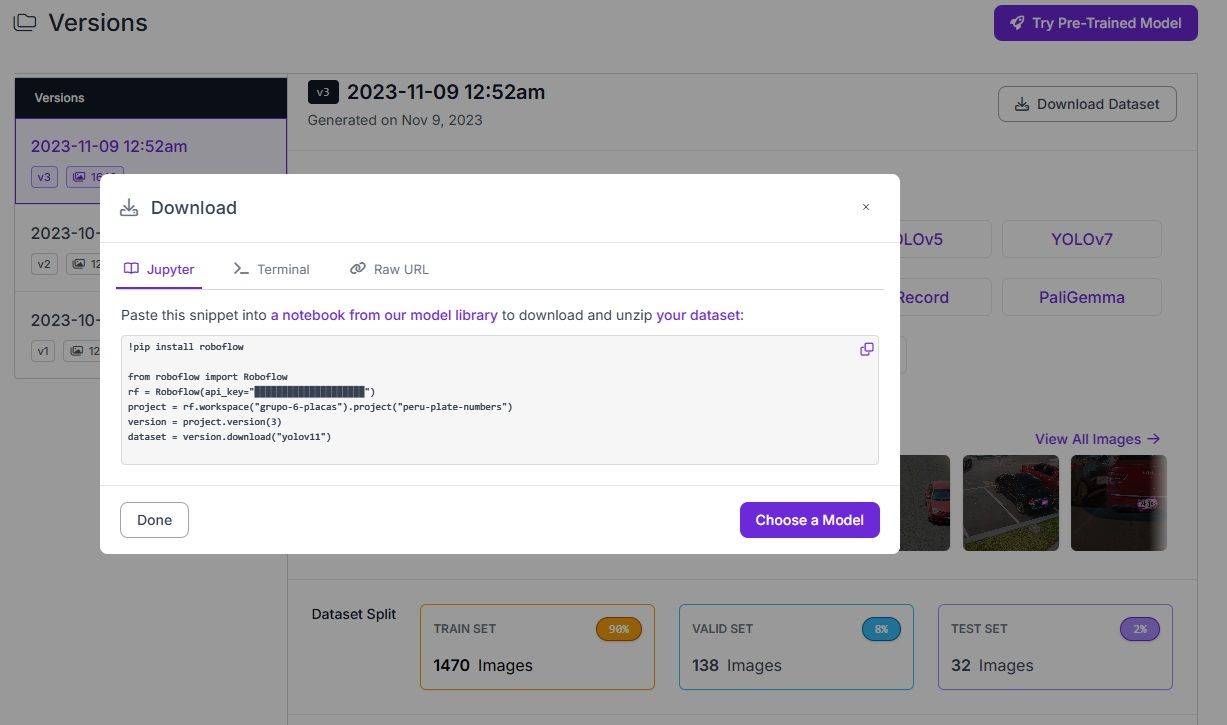

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="bWdjQu8RfOZOkj6aC55m")
project = rf.workspace("grupo-6-placas").project("peru-plate-numbers")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Peru-Plate-Numbers-3 in yolov11:: 100%|██████████| 3292/3292 [00:09<00:00, 344.78it/s] 


## 📄 Verificación del archivo `data.yaml` descargado desde Roboflow

Una vez que descargamos el dataset desde Roboflow, uno de los archivos más importantes que se genera es `data.yaml`. Este archivo contiene:

- 📂 Las rutas a las carpetas de entrenamiento (`train`), validación (`valid`) y prueba (`test`).
- 📌 El número de clases (`nc`) y los nombres asociados a esas clases (`names`), en nuestro caso: `['car-plate']`.

Es fundamental asegurarse de que **este archivo existe** antes de iniciar el entrenamiento del modelo con YOLOv11. Si no existe o está mal ubicado, el comando de entrenamiento fallará.

---

### 🔍 ¿Qué hace este bloque de código?

Este pequeño script hace dos cosas:

1. Define la ruta donde esperamos encontrar el archivo `data.yaml` (generalmente dentro de la carpeta del dataset descargado).
2. Verifica si ese archivo existe en esa ruta.
3. Muestra un mensaje confirmando si el archivo fue encontrado o no.

Este paso es muy útil para depurar errores y asegurarnos de que todo está correctamente configurado antes de entrenar el modelo. ✅




In [4]:
# 📍 Especificamos la ruta donde debería estar el archivo data.yaml
file_path = '/content/Peru-Plate-Numbers-3/data.yaml'

# 🧪 Verificamos si el archivo realmente existe en esa ubicación
if os.path.exists(file_path):
    print(f"✅ El archivo se encuentra en la ruta: {file_path}")
else:
    print(f"❌ No se encontró el archivo en la ruta esperada: {file_path}")
    print("🔁 Verifica que hayas ejecutado correctamente la descarga desde Roboflow.")


✅ El archivo se encuentra en la ruta: /content/Peru-Plate-Numbers-3/data.yaml


## 📁 Explorando el Directorio Actual de Trabajo en Python

Cuando trabajamos con archivos en Python (como imágenes, etiquetas o archivos `.yaml`), es fundamental **saber en qué carpeta estamos ubicados**. Muchas veces, errores comunes suceden porque los archivos no están donde el código los está buscando.

Este bloque de código nos permite:

1. 📍 Obtener la carpeta actual donde estamos trabajando (con `os.getcwd()`).
2. 🗂️ Listar todos los archivos y subcarpetas presentes en esa ruta (con `os.listdir()`).

---

### ¿Por qué esto es útil en nuestro proyecto con YOLOv11?

- ✅ Nos ayuda a confirmar si el dataset descargado desde Roboflow está en el lugar correcto.
- ✅ Podemos ver si se generó el archivo `data.yaml`, y si existen las carpetas `train`, `valid`, `test`.
- ✅ Es muy útil especialmente cuando trabajamos en entornos como **Google Colab**, donde el sistema de archivos puede cambiar según cómo subimos o descargamos datos.



In [9]:
# 📍 Obtener la ruta actual del directorio donde estamos trabajando
cwd = os.getcwd()
print(f"📌 Directorio actual de trabajo: {cwd}")

# 🗂️ Listar todos los archivos y subcarpetas dentro del directorio actual
files = os.listdir(cwd)
print(f"📁 Archivos y carpetas dentro de '{cwd}': {files}")


# ✅ Esto nos ayuda a confirmar si los datos descargados desde Roboflow están donde deberían

📌 Directorio actual de trabajo: /content
📁 Archivos y carpetas dentro de '/content': ['.config', 'Peru-Plate-Numbers-3', 'sample_data']


## 🧹 Eliminación de Archivos y Carpetas: Limpieza del Entorno 🗑️

En ciertos casos, especialmente cuando trabajamos en entornos como **Google Colab**, aparecen carpetas por defecto como `sample_data`. Estas carpetas no forman parte de nuestro proyecto y pueden generar confusión o desorden.

Este bloque de código tiene como objetivo:

1. 🗂️ Acceder a la carpeta `sample_data` dentro del directorio actual.
2. ❌ Eliminar todos los archivos contenidos en esa carpeta.
3. 🧽 Borrar la carpeta completa una vez que esté vacía.

---

### 🛠️ ¿Por qué hacemos esto?

- Para **mantener nuestro entorno de trabajo limpio y organizado**.
- Evita confusiones al listar archivos o preparar los datos del modelo YOLOv11.
- Es útil al final del entrenamiento o antes de subir archivos nuevos.

---

### ⚠️ Precaución

Este código **elimina archivos permanentemente**, así que debemos asegúrarnos de que no haya archivos importantes dentro de la carpeta que se va a borrar (`sample_data`) antes de ejecutar esta celda.


In [10]:
# 🧭 Ruta completa hacia la carpeta 'sample_data' (común en Colab)
dir_path = cwd + "/sample_data"

# 🔄 Recorremos todos los archivos dentro de 'sample_data' y los eliminamos uno por uno
for archivo in os.listdir(dir_path):
    os.remove(dir_path + "/" + archivo)  # 🚫 Eliminamos cada archivo

# 🗑️ Finalmente, eliminamos la carpeta vacía
os.rmdir(dir_path)

# 🧼 Resultado: entorno más limpio y enfocado solo en el proyecto de detección de placas


## 📄 Verificando y Mostrando el Contenido de `data.yaml` desde la Ruta del Dataset 📂

Una vez descargado el dataset desde **Roboflow**, se genera una carpeta (por ejemplo, `Peru-Plate-Numbers-3`) que contiene el archivo `data.yaml`. Este archivo es fundamental para que YOLOv11 pueda saber:

- Dónde están las imágenes de entrenamiento, validación y prueba.
- Cuántas clases existen (`nc`).
- Cuáles son los nombres de esas clases (`names`).

---

### ✅ ¿Qué hace este bloque de código?

1. **Comprueba** si la variable `dataset.location` contiene la ruta correcta al dataset descargado.
2. **Construye** la ruta completa al archivo `data.yaml`.
3. **Intenta abrir** el archivo y mostrar su contenido por pantalla.
4. **Muestra un mensaje de error** si el archivo no se encuentra, para ayudar a diagnosticar el problema.

---

### 🧠 ¿Por qué esto es importante?

- Evita errores al entrenar el modelo por no encontrar `data.yaml`.
- Permite verificar visualmente que el archivo contiene rutas y nombres correctos.
- Es un paso de control muy útil cuando descargamos múltiples versiones o datasets diferentes.



In [12]:
# ✅ Verifica que la ruta dataset.location esté correctamente definida
# Si no lo está, descomenta esta línea y ajusta la ruta manualmente:
# dataset_location = '/content/Peru-Plate-Numbers-1'  # ← Cambia según corresponda

# 📄 Ruta completa hacia el archivo data.yaml
path_to_data_yaml = f'{dataset.location}/data.yaml'

# 🖨️ Mostramos la ruta y tratamos de leer el contenido del archivo
print(f"📂 Mostrando el contenido de: {path_to_data_yaml}")

try:
    with open(path_to_data_yaml, 'r') as f:
        print(f.read())  # 📜 Imprimimos el contenido del archivo YAML
except FileNotFoundError:
    print(f"❌ ERROR: No se encontró el archivo en {path_to_data_yaml}")
    print("🔍 Verifica que 'dataset.location' esté bien definido.")
    print("📦 También asegúrate de que el archivo data.yaml fue creado correctamente al descargar desde Roboflow.")


📂 Mostrando el contenido de: /content/Peru-Plate-Numbers-3/data.yaml
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Placa', 'placa']

roboflow:
  workspace: grupo-6-placas
  project: peru-plate-numbers
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/grupo-6-placas/peru-plate-numbers/dataset/3


## ⚠️ ¡Atención! Problema con Clases Duplicadas en el archivo `data.yaml`

Al revisar el contenido del archivo `data.yaml` generado por Roboflow, encontramos lo siguiente:

###yaml
names: ['Placa', 'placa']
---
---

Observado

## 🚀 Cargando el Modelo YOLOv11 Nano y Visualizando su Arquitectura 🧠🔍

Una vez que tenemos listo nuestro entorno y el dataset preparado, el siguiente paso es **cargar el modelo YOLO** que vamos a entrenar o utilizar para predicción. En este caso, trabajaremos con **YOLOv11 nano**, una versión ligera y rápida, ideal para computadoras personales y Google Colab.

---

### 🧩 ¿Qué hace este bloque de código?

1. **Importa el objeto `YOLO`** desde la librería `ultralytics`.
2. **Carga el modelo preentrenado** `yolo11n.pt` desde los archivos del sistema (o lo descarga si no está).
3. **Muestra información detallada** del modelo: número de capas, parámetros, tamaño, etc.

---

### 💬 Explicación paso a paso:

🔹 `from ultralytics import YOLO`  
→ Importa la clase principal que nos permite crear, entrenar o utilizar modelos YOLOv11.

🔹 `model = YOLO("yolo11n.pt")`  
→ Carga el modelo YOLO versión 11 nano (`n` de "nano"), el cual ya viene preentrenado en el dataset COCO.

🔹 `model.info()`  
→ Muestra la estructura interna del modelo:  
   - Número total de parámetros.  
   - Número de capas.  
   - Tamaño estimado del archivo.  
   - Información útil para comprender su complejidad y velocidad.

---

### 🧠 ¿Por qué usamos YOLOv11n (nano)?

- ✅ Es más rápido que otras versiones (ideal para entrenar rápido).
- ✅ Tiene menos parámetros (ocupa menos memoria).
- ✅ Es útil para prototipos y pruebas iniciales, especialmente en computadoras con GPU limitada.




In [17]:
# 🧠 Importamos la clase YOLO desde la librería ultralytics
# Esta clase nos permite crear, entrenar y utilizar modelos de la familia YOLO
from ultralytics import YOLO

# 📦 Cargamos el modelo YOLOv11 en su versión más liviana ('n' de 'nano')
# Este modelo viene preentrenado en el dataset COCO
model = YOLO("yolo11n.pt")

# 🔍 Mostramos información detallada del modelo cargado
# Incluye: número de parámetros, arquitectura, capas y tamaño del modelo
model.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

## ⚙️ Cambiando la Ruta por Defecto del Dataset en Ultralytics YOLOv11

Por defecto, la librería `ultralytics` guarda y busca los datasets en una carpeta como `~/datasets`. Sin embargo, cuando trabajamos en **Google Colab** o con datasets descargados desde **Roboflow**, es común que el dataset esté ubicado en otro lugar, como `/content/Peru-Plate-Numbers-3`.

---

### 🧠 ¿Qué hace este bloque de código?

1. Importa la herramienta de configuración global `settings` de la librería `ultralytics`.
2. Actualiza el valor del parámetro `datasets_dir` para que apunte a la carpeta donde realmente se encuentra nuestro dataset.

---

### 📌 ¿Por qué es importante hacer esto?

- Evita errores como “no se encuentra el dataset” al entrenar o validar.
- Permite que YOLOv11 ubique automáticamente el archivo `data.yaml` y las carpetas `train`, `valid`, `test` sin necesidad de especificar rutas absolutas en cada comando.
- Hace el código más limpio, reutilizable y profesional.

---

### ✅ ¿Cuándo debes usarlo?

- Después de descargar el dataset desde Roboflow.
- Antes de iniciar el entrenam


In [18]:
# ⚙️ Importamos el módulo de configuración de la librería Ultralytics
from ultralytics import settings

# 📁 Redefinimos la ruta por defecto donde YOLO buscará los datasets
# En este caso, apuntamos a la carpeta donde se encuentra el dataset descargado desde Roboflow
settings.update({'datasets_dir': '/content/Peru-Plate-Numbers-3'})

# ✅ Con esto, los comandos de entrenamiento ya no necesitan rutas completas al data.yaml
# YOLO buscará los datos directamente en esta ubicación


# 🏁 Entrenamiento del Modelo YOLOv11 con Nuestro Dataset de Placas Peruanas 🚗🇵🇪

Llegamos al paso más importante de todo el proyecto: **entrenar el modelo YOLOv11** con nuestro dataset personalizado descargado desde Roboflow. Este paso le permite al modelo **aprender a detectar placas peruanas** en imágenes reales.

---

### 🧠 ¿Qué hace este bloque de código?

Este bloque ejecuta el entrenamiento de YOLOv11 con los siguientes parámetros clave:

- 📄 `data`: ruta al archivo `data.yaml`, que indica dónde están las imágenes y cómo se llama la clase (placa).
- 🔁 `epochs`: número de veces que el modelo pasará por todo el dataset (más épocas = mejor aprendizaje, pero más lento).
- 🖼️ `imgsz`: tamaño al que se redimensionan todas las imágenes antes de entrar al modelo (640 es un buen estándar).
- 📦 `batch`: número de imágenes que se procesan en cada iteración. Depende de la memoria de tu GPU.
- 📁 `name` y `project`: definen la carpeta de salida donde se guardarán los resultados (pesos, métricas, gráficos, etc.).

---

### 🧪 ¿Qué resultados obtendremos?

- ✅ Un modelo entrenado (`best.pt`) listo para usar en detección.
- 📈 Curvas de entrenamiento: precisión, recall, mAP por época.
- 📂 Archivos de resultados en `proyecto_placas/entrenamiento_placas/`.

Este paso es crucial para evaluar si nuestro dataset es de buena calidad y si el modelo está aprendiendo correctamente.


In [20]:
# (opcional) Cambiar al directorio base si es necesario
# os.chdir("/content")  # Solo si estás en Google Colab y tienes conflictos con rutas

# 🚀 Entrenamos el modelo YOLOv11 con nuestro dataset personalizado de placas peruanas
model.train(
    data='/content/Peru-Plate-Numbers-3/data.yaml',  # 📄 Ruta al archivo data.yaml generado por Roboflow
    epochs=10,                 # 🔁 Número de épocas (puedes aumentar para mayor precisión)
    imgsz=640,                 # 🖼️ Tamaño de las imágenes que se usarán durante el entrenamiento
    batch=16,                  # 📦 Número de imágenes procesadas por lote (ajusta según tu GPU)
    name="entrenamiento_placas",   # 🗂️ Nombre de la carpeta interna del experimento
    project="proyecto_placas"      # 📁 Carpeta donde se guardarán todos los resultados
)

# ✅ Este comando iniciará el entrenamiento y generará:
# - Curvas de precisión y pérdida
# - Pesos del modelo entrenado (best.pt)
# - Gráficos de métricas en tiempo real


Ultralytics 8.3.142 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Peru-Plate-Numbers-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrenamiento_placas2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

train: Scanning /content/Peru-Plate-Numbers-3/train/labels.cache... 1470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1184.9±1301.9 MB/s, size: 1275.3 KB)


val: Scanning /content/Peru-Plate-Numbers-3/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to proyecto_placas/entrenamiento_placas2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to proyecto_placas/entrenamiento_placas2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.42G      1.439      2.237     0.9431         27        640: 100%|██████████| 92/92 [02:06<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        138        257      0.779      0.758      0.797      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.62G      1.469      1.922     0.9547         30        640: 100%|██████████| 92/92 [02:05<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        138        257      0.878      0.779      0.902      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.64G       1.42      1.579     0.9491         27        640: 100%|██████████| 92/92 [02:00<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        138        257      0.505      0.744      0.577      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.64G      1.415      1.359     0.9421         28        640: 100%|██████████| 92/92 [01:55<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        138        257      0.838      0.775      0.872       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.64G      1.368      1.202     0.9267         27        640: 100%|██████████| 92/92 [01:54<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]

                   all        138        257      0.789      0.881       0.88      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.64G       1.34       1.08     0.9313         28        640: 100%|██████████| 92/92 [01:50<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        138        257      0.889      0.913      0.928      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.65G      1.322       1.01     0.9184         30        640: 100%|██████████| 92/92 [01:49<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        138        257      0.922      0.912      0.935      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.66G      1.264     0.9741     0.9075         25        640: 100%|██████████| 92/92 [01:47<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]

                   all        138        257      0.907      0.944       0.95      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.66G      1.228     0.9415     0.8921         25        640: 100%|██████████| 92/92 [01:45<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        138        257      0.928      0.849      0.934      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.68G        1.2     0.9242     0.8867         25        640: 100%|██████████| 92/92 [01:55<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        138        257      0.873      0.919      0.943      0.647



10 epochs completed in 0.333 hours.
Optimizer stripped from proyecto_placas/entrenamiento_placas2/weights/last.pt, 5.5MB
Optimizer stripped from proyecto_placas/entrenamiento_placas2/weights/best.pt, 5.5MB

Validating proyecto_placas/entrenamiento_placas2/weights/best.pt...
Ultralytics 8.3.142 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


                   all        138        257      0.872      0.919      0.943      0.646
                 Placa        106        203      0.831      0.911      0.908      0.563
                 placa         32         54      0.913      0.926      0.978      0.728
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to proyecto_placas/entrenamiento_placas2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc7b323ed10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## 📁 Verificación de Resultados del Entrenamiento en la Carpeta del Proyecto YOLOv11 ✅

Después de entrenar nuestro modelo YOLOv11, todos los resultados (como los pesos del modelo `best.pt`, los gráficos de métricas y los registros del entrenamiento) se guardan automáticamente en una carpeta específica dentro del proyecto.

Este bloque de código nos permite:

1. 📂 Verificar si la carpeta `proyecto_placas/entrenamiento_placas2` realmente existe.
2. 📄 Listar todos los archivos y subcarpetas que fueron generados durante el entrenamiento.
3. 🔎 Confirmar que el entrenamiento se ejecutó correctamente y que se generaron los archivos esperados.

---

### 🧠 ¿Por qué esto es importante?

- Evita confusiones o errores al buscar el modelo entrenado.
- Permite saber si el nombre del experimento fue escrito correctamente.
- Asegura que podremos usar el archivo `best.pt` en la siguiente etapa (inferencia o validación).



In [31]:
import os

# 📂 Definimos la ruta donde se guardaron los resultados del entrenamiento
directory = "/content/proyecto_placas/entrenamiento_placas2"

# 🧪 Verificamos si esa ruta existe
if os.path.exists(directory):
    print("✅ Archivos encontrados en el directorio del entrenamiento:")
    print(os.listdir(directory))  # 📄 Mostramos la lista de archivos y carpetas
else:
    print(f"❌ El directorio '{directory}' no existe.")
    print("🔍 Verifica que el nombre del experimento sea correcto (name=...) en model.train().")


✅ Archivos encontrados en el directorio del entrenamiento:
['confusion_matrix.png', 'val_batch2_labels.jpg', 'args.yaml', 'results.png', 'F1_curve.png', 'val_batch2_pred.jpg', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png', 'train_batch2.jpg', 'val_batch1_labels.jpg', 'weights', 'train_batch0.jpg', 'labels_correlogram.jpg', 'R_curve.png', 'val_batch1_pred.jpg', 'train_batch1.jpg', 'results.csv', 'labels.jpg', 'PR_curve.png', 'val_batch0_labels.jpg', 'P_curve.png']


## 📊 Análisis de Métricas del Entrenamiento con YOLOv11 🧠📈

Una vez finalizado el entrenamiento del modelo, YOLOv11 genera un archivo llamado `results.csv` que contiene **todas las métricas** obtenidas en cada época. Este archivo está ubicado dentro de la carpeta del proyecto (`proyecto_placas/entrenamiento_placas2`).

---

### 🔍 ¿Qué hace este bloque de código?

1. Carga el archivo `results.csv` como un **DataFrame** de `pandas`.
2. Muestra las primeras 5 filas del DataFrame para tener una vista general.
3. Imprime la lista de índices (épocas) y las columnas disponibles.
4. Genera un resumen estadístico con `.describe()` para evaluar el comportamiento general de cada métrica.

---

### 📈 ¿Qué tipo de métricas veremos?

- `metrics/precision`: Precisión del modelo (detecciones correctas sobre el total de positivas predichas).
- `metrics/recall`: Capacidad del modelo para encontrar todas las placas reales.
- `metrics/mAP_0.5`: Precisión media cuando la superposición es de al menos 50%.
- `train/cls_loss`, `train/box_loss`: Errores durante el entrenamiento.

---

### 🧠 ¿Por qué es importante esto?

- Nos permite evaluar si el modelo está aprendiendo correctamente.
- Podemos detectar si hay **overfitting** (cuando mejora en entrenamiento pero no en validación).
- Sirve para comparar distintas configuraciones de entrenamiento de forma objetiva.




In [32]:
# 📥 Cargamos el archivo de métricas generado por YOLOv11 durante el entrenamiento
df_metrics = pd.read_csv("/content/proyecto_placas/entrenamiento_placas2/results.csv")

# 👀 Mostramos las primeras 5 filas del DataFrame (una fila por cada época)
print("🔍 Primeras 5 épocas registradas en el entrenamiento:")
print(df_metrics.head(5))

# 📌 Mostramos la lista de índices (número de época) y las columnas (tipos de métricas)
print("🧾 Índices disponibles (épocas):")
print(df_metrics.index.to_list())

print("📊 Columnas disponibles (métricas registradas):")
print(df_metrics.columns.to_list())

# 📉 Descripción estadística de todas las métricas (media, desviación, min, max, etc.)
print("📈 Resumen estadístico de las métricas:")
df_metrics.describe()

🔍 Primeras 5 épocas registradas en el entrenamiento:
   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  133.371         1.43942         2.23683         0.94312   
1      2  263.071         1.46945         1.92210         0.95472   
2      3  387.830         1.42016         1.57888         0.94907   
3      4  508.312         1.41488         1.35880         0.94215   
4      5  627.754         1.36810         1.20220         0.92666   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.77874            0.75826           0.79733   
1               0.87789            0.77895           0.90203   
2               0.50489            0.74410           0.57743   
3               0.83777            0.77490           0.87157   
4               0.78876            0.88132           0.88040   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.41169       1.45498       1.47511       0.89384  0.0

epoch         time  train/box_loss  train/cls_loss  train/dfl_loss  \
count  10.00000    10.000000       10.000000       10.000000       10.000000   
mean    5.50000   676.638300        1.346650        1.322825        0.925171   
std     3.02765   355.340967        0.092554        0.454474        0.023632   
min     1.00000   133.371000        1.200380        0.924170        0.886680   
25%     3.25000   417.950500        1.278668        0.982980        0.910215   
50%     5.50000   685.407000        1.353870        1.141110        0.928980   
75%     7.75000   941.077750        1.418840        1.523860        0.942878   
max    10.00000  1198.620000        1.469450        2.236830        0.954720   

       metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
count             10.000000          10.000000         10.000000   
mean               0.830792           0.847391          0.871938   
std                0.125528           0.076415          0.113272   
min                0.504890           0.744100          0.577430   
25%                0.801013           0.775913          0.873777   
50%                0.875490           0.865150          0.915265   
75%                0.902913           0.912778          0.934800   
max                0.928180           0.943820          0.950420   

       metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss  \
count            10.000000     10.000000     10.000000     10.000000   
mean              0.530364      1.358359      1.030832      0.879374   
std               0.106742      0.125402      0.405258      0.022610   
min               0.314550      1.193160      0.763730      0.849800   
25%               0.493465      1.245755      0.774728      0.856675   
50%               0.530895      1.383105      0.891605      0.886070   
75%               0.621890      1.448007      1.000317      0.893042   
max               0.647450      1.565080      2.010050      0.913910   

          lr/pg0     lr/pg1     lr/pg2  
count  10.000000  10.000000  10.000000  
mean    0.000762   0.000762   0.000762  
std     0.000371   0.000371   0.000371  
min     0.000182   0.000182   0.000182  
25%     0.000521   0.000521   0.000521  
50%     0.000759   0.000759   0.000759  
75%     0.001004   0.001004   0.001004  
max     0.001332   0.001332   0.001332

## 📊 Análisis de Resultados del Entrenamiento (10 Épocas) con YOLOv11 🔍📈

Después de entrenar el modelo durante 10 épocas, analizamos las métricas obtenidas para evaluar el desempeño del modelo de detección de placas peruanas.

---

### 🧠 ¿Qué nos dicen estas métricas?

A continuación te explico algunas de las métricas más importantes registradas:

#### 🎯 Precisión (`metrics/precision(B)`)
- Mide **cuántas de las predicciones positivas fueron correctas**.
- **Promedio**: 0.83 → muy buena precisión general.

#### 🔔 Recall (`metrics/recall(B)`)
- Mide **cuántas placas reales fueron detectadas**.
- **Promedio**: 0.84 → el modelo detectó la mayoría de las placas reales.

#### 🟩 mAP@0.5 (`metrics/mAP50(B)`)
- Es la **métrica más usada en detección de objetos**.
- **Promedio**: 0.87 → indica que el modelo detecta muy bien las placas en condiciones normales.

#### 🟦 mAP@0.5:0.95 (`metrics/mAP50-95(B)`)
- Es más exigente: mide qué tan bien detecta el modelo a distintos niveles de precisión.
- **Promedio**: 0.53 → aceptable, pero con margen de mejora.

#### 📉 Pérdida de clasificación (`train/cls_loss`)
- Comenzó en **2.23** y bajó a **1.20** → buena señal de aprendizaje.

#### 📦 Pérdida de validación (`val/box_loss` y `val/cls_loss`)
- Se mantuvo entre 1.19 y 1.56, indicando que el modelo no está sobreajustado.

---

### 📌 Interpretación General

| Métrica                | Resultado Promedio | Interpretación                           |
|------------------------|--------------------|------------------------------------------|
| Precision              | 0.83               | El modelo hace predicciones confiables. |
| Recall                 | 0.84               | Detecta la mayoría de placas reales.    |
| mAP@0.5                | 0.87               | Detecta bien con IoU ≥ 0.5.              |
| mAP@0.5:0.95           | 0.53               | Puede mejorar en casos más exigentes.   |
| Pérdida de entrenamiento | Disminuye         | El modelo está aprendiendo progresivamente. |

---

### ✅ Conclusión

El modelo muestra un rendimiento **muy bueno en solo 10 épocas**. Con más entrenamiento (20-50 épocas), o mejoras en el dataset, es muy probable que:

- Aumente el mAP@0.5:0.95.
- Reduzca más la pérdida en validación.
- Sea más robusto frente a condiciones variables (ángulos, luces, fondos).

Puedes usar estos resultados para validar que el entrenamiento fue exitoso, ¡y seguir iterando para mejorarlo aún más! 🚀


## 📈 Visualización Gráfica de las Métricas de Entrenamiento con YOLOv11 🎯📊

Para evaluar si el modelo YOLOv11 está aprendiendo correctamente, es fundamental **visualizar cómo evolucionan las métricas** durante el entrenamiento. Esto se hace utilizando los datos almacenados en el archivo `results.csv`.

---

### 🔍 ¿Qué métricas vamos a graficar?

1. 🧠 `train/cls_loss`: pérdida de clasificación durante el entrenamiento (debe disminuir).
2. 🟩 `metrics/mAP50(B)`: precisión media (IoU ≥ 0.5) → métrica principal para detección de objetos.
3. 🟦 `metrics/mAP50-95(B)`: precisión media en rangos de IoU de 0.5 a 0.95 → métrica más exigente.
4. 🟨 `metrics/precision(B)`: qué tan precisas son las predicciones del modelo.

---

### 🎯 ¿Por qué es útil graficar estas métricas?

- Nos permite ver si el modelo **está aprendiendo** (cuando las métricas mejoran con las épocas).
- Detectamos **sobreajuste** si las métricas de validación se estancan o empeoran mientras la pérdida sigue bajando.
- Es una forma visual de justificar por qué elegimos el modelo final.

---

### 🧠 Tips para interpretar el gráfico

- La **pérdida (`train/cls_loss`)** debe bajar progresivamente.
- Las métricas de validación (`mAP`, `precision`) deben subir y luego estabilizarse.
- Si las curvas suben y luego bajan, podrías necesitar menos épocas o aplicar técnicas contra el overfitting.


📋 Columnas del archivo results.csv:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.


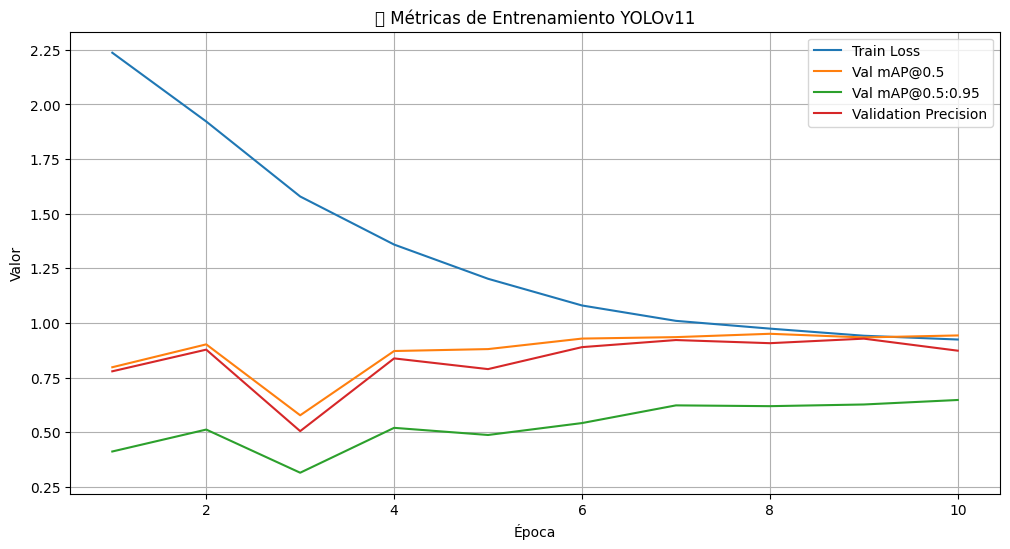

In [33]:
# 👀 Revisamos las métricas disponibles en el archivo
print("📋 Columnas del archivo results.csv:")
print(df_metrics.columns.to_list())

# 📈 Graficamos múltiples métricas clave para evaluar el desempeño del modelo
plt.figure(figsize=(12, 6))  # 🎨 Tamaño del gráfico

# 🔻 Pérdida de clasificación durante el entrenamiento (debe bajar)
plt.plot(df_metrics[['epoch']], df_metrics[['train/cls_loss']], label='Train Loss')

# 🔹 mAP con IoU ≥ 0.5 (precisión en validación, valor más usado)
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50(B)']], label='Val mAP@0.5')

# 🔸 mAP con IoU de 0.5 a 0.95 (métrica más exigente)
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/mAP50-95(B)']], label='Val mAP@0.5:0.95')

# 🟨 Precisión del modelo en validación (detecciones correctas vs. totales)
plt.plot(df_metrics[['epoch']], df_metrics[['metrics/precision(B)']], label='Validation Precision')

# 🧭 Etiquetas y leyenda
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('📊 Métricas de Entrenamiento YOLOv11')
plt.legend()
plt.grid(True)
plt.show()


## ✅ Evaluación Final del Modelo YOLOv11 con el Dataset de Validación 📊🔍

Una vez que hemos entrenado nuestro modelo y visualizado las curvas de aprendizaje, el paso final es **evaluar el rendimiento del modelo sobre el conjunto de validación**. Esta evaluación nos permite comprobar cómo se comporta el modelo con datos que **nunca ha visto durante el entrenamiento**.

---

### 🧠 ¿Qué hace este bloque?

1. Ejecuta la función `val()` sobre el modelo actual (`model`) que hemos entrenado.
2. Evalúa automáticamente las métricas de validación:
   - Precisión (`Precision`)
   - Recall
   - mAP@0.5
   - mAP@0.5:0.95
3. Imprime los resultados para que podamos analizarlos y compararlos con los objetivos del proyecto.

---

### 🔍 Importante:

- Nos dá **medición objetiva** del rendimiento real del modelo.
- Confirma si el modelo puede generalizar o si solo ha memorizado el entrenamiento.
- Nos permite tomar decisiones informadas antes de exportar o aplicar el modelo.

---

### 📌 Nota

Este comando evaluará el modelo sobre el conjunto de validación definido en `data.yaml`.

In [34]:
# 📊 Evaluamos el modelo entrenado utilizando el conjunto de validación
results = model.val()  # ⚙️ Esto ejecuta la validación automática basada en el data.yaml

# 📋 Mostramos los resultados principales: precisión, recall, mAP, etc.
print("🔍 Resultados de la evaluación del modelo:")
print(results)


Ultralytics 8.3.142 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2721.2±1064.5 MB/s, size: 1984.9 KB)


val: Scanning /content/Peru-Plate-Numbers-3/valid/labels.cache... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 257. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


                   all        138        257      0.878      0.921      0.943      0.645
                 Placa        106        203      0.835      0.916      0.908      0.567
                 placa         32         54      0.921      0.926      0.979      0.723
Speed: 1.0ms preprocess, 8.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to proyecto_placas/entrenamiento_placas22
🔍 Resultados de la evaluación del modelo:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc7b474a650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.0

## 📋 Evaluación Final del Modelo YOLOv11 sobre Validación 🧪

El modelo ha sido evaluado usando el dataset de validación definido en `data.yaml`. A continuación se presentan y explican los resultados clave:

---

### 🧠 Métricas Generales:

| Métrica                        | Valor   | Interpretación                                                                 |
|-------------------------------|---------|-------------------------------------------------------------------------------|
| `Precision`                   | **0.878** | De todas las placas que el modelo predijo, el **87.8%** fueron correctas.     |
| `Recall`                      | **0.921** | El modelo detectó el **92.1%** de las placas reales en las imágenes.          |
| `mAP@0.5`                     | **0.943** | Precisión promedio cuando el IoU ≥ 0.5. Muy alto → detecciones precisas.      |
| `mAP@0.5:0.95`                | **0.645** | Promedio de mAP en 10 umbrales (de 0.5 a 0.95). Buen resultado, pero mejorable.|
| `Fitness`                     | **0.675** | Valor global de ajuste del modelo (mezcla ponderada de todas las métricas).  |

---

### 📌 Clases Detectadas:

| Clase   | Imágenes | Instancias | Precision | Recall | mAP@0.5 | mAP@0.5:0.95 |
|---------|----------|------------|-----------|--------|---------|--------------|
| `Placa` | 106      | 203        | 0.835     | 0.916  | 0.908   | 0.567        |
| `placa` | 32       | 54         | 0.921     | 0.926  | 0.979   | 0.723        |

> ⚠️ *Nota:* Hay dos clases muy similares (`Placa` y `placa`), lo cual **puede causar confusión** en la clasificación. Se recomienda **unificar ambas etiquetas** en el dataset para obtener resultados más coherentes.

---

### ⚡ Velocidad de procesamiento:

- **Preprocesamiento:** 1.0 ms / imagen
- **Inferencia:** 8.2 ms / imagen
- **Postproceso:** 2.4 ms / imagen

✅ Ideal para aplicaciones **en tiempo real** con hardware como GPUs Tesla T4.

---

### 📌 Recomendaciones Finales

- **Unificar las clases `Placa` y `placa`** para evitar ambigüedades.
- **entrenar más épocas** (actualmente solo 10), ya que las curvas no se han estabilizado del todo.




In [ ]:
#Empezamos las pruebas con el modelo ya entrenado

## 🔍 Inferencia Final con el Modelo YOLOv11 Entrenado 🖼️📦

Después de haber entrenado y validado nuestro modelo YOLOv11, el siguiente paso es **usarlo para hacer predicciones reales** sobre nuevas imágenes. Esta etapa se llama **inferencia**.

---

### 🎯 ¿Qué hace este bloque de código?

1. **Carga el modelo entrenado** a partir del archivo `best.pt`, que contiene los mejores pesos obtenidos durante el entrenamiento.
2. **Realiza una predicción (detección)** sobre una imagen nueva (`placacarro1.jpg`).
3. **Guarda automáticamente** la imagen con las cajas de predicción dibujadas (bounding boxes).
4. **Imprime en consola**:
   - La ruta de la imagen procesada.
   - Las coordenadas de las cajas detectadas (`Bounding Box`).
   - El nivel de confianza (`Confianza`) de cada predicción.
   - El número de clase (`Clase`) predicha.

---

### 🧠 ¿Por qué esto es importante?

- Nos permite **ver si el modelo funciona con imágenes reales**.
- Podemos evaluar visualmente si las **detecciones son correctas y precisas**.
- Es un paso esencial antes de usar el modelo en una aplicación real.


## 📥 Paso 1: Subir imagen desde tu computadora

En esta sección podrás cargar una o más imágenes desde tu computadora al entorno de trabajo. Asegúrate de que las imágenes contengan placas peruanas visibles para que el modelo pueda hacer la predicción correctamente.

> Puedes usar cualquier formato como `.jpg`, `.jpeg` o `.png`, siempre que la imagen sea clara.


In [36]:
# 🔼 Usamos el módulo 'files' para subir imágenes desde la computadora (en Google Colab)
from google.colab import files

# 📂 Esto abrirá una ventana para seleccionar archivos desde tu PC
uploaded = files.upload()

# ✅ Confirmamos que las imágenes fueron subidas correctamente
print("📸 Imágenes cargadas:")
for nombre in uploaded.keys():
    print(f"✔️ {nombre}")


Saving testplaca.jpg to testplaca.jpg
📸 Imágenes cargadas:
✔️ testplaca.jpg


## 🧠 Paso 2: Cargar el modelo YOLOv11 entrenado

En este paso cargamos el modelo que fue entrenado previamente con imágenes de placas peruanas. Este modelo se encuentra guardado como `best.pt`, y contiene los pesos que aprendió durante el entrenamiento.

> Asegúrate de que la ruta al archivo `.pt` sea correcta.


In [37]:
# 🧠 Importamos la clase YOLO y cargamos el modelo entrenado con placas
from ultralytics import YOLO

# 📁 Cambia la ruta si guardaste los pesos en otro directorio o con otro nombre
modelo_entrenado = YOLO("/content/proyecto_placas/entrenamiento_placas2/weights/best.pt")

print("✅ Modelo cargado exitosamente.")


✅ Modelo cargado exitosamente.


## 🔍 Paso 3: Realizar inferencia sobre la(s) imagen(es) subida(s)

Ahora utilizaremos el modelo cargado para analizar las imágenes que acabamos de subir. El modelo detectará placas vehiculares en cada imagen y mostrará:

- La ubicación de la placa (coordenadas de la caja delimitadora)
- El nivel de confianza de la detección
- El número de clase detectada (en este caso, probablemente siempre será 0 si tienes solo una clase)

> Las imágenes con las detecciones se guardarán automáticamente en la carpeta `runs/detect/predict/`.


In [38]:
# 🔎 Hacemos predicción sobre cada imagen subida
for nombre in uploaded.keys():
    resultados = modelo_entrenado.predict(source=nombre, save=True)

    print(f"📂 Imagen analizada: {nombre}")

    for resultado in resultados:
        for caja, conf, clase in zip(resultado.boxes.xyxy, resultado.boxes.conf, resultado.boxes.cls):
            print(f"📦 Bounding Box: {caja} | 🎯 Confianza: {conf:.2f} | 🏷️ Clase detectada: {int(clase)}")



image 1/1 /content/testplaca.jpg: 448x640 1 placa, 42.6ms
Speed: 2.7ms preprocess, 42.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
📂 Imagen analizada: testplaca.jpg
📦 Bounding Box: tensor([573.3409, 856.2102, 764.0294, 963.8927], device='cuda:0') | 🎯 Confianza: 0.56 | 🏷️ Clase detectada: 1


## 🖼️ Paso 4: Visualizar la Imagen con la Placa Detectada

Después de ejecutar el modelo, las imágenes con las cajas de detección se guardan automáticamente en la carpeta:

/content/runs/detect/predict/


En esta sección, vamos a **mostrar visualmente** una de esas imágenes para comprobar que el modelo detectó correctamente la(s) placa(s).




🖼️ Mostrando: /content/runs/detect/predict/testplaca.jpg


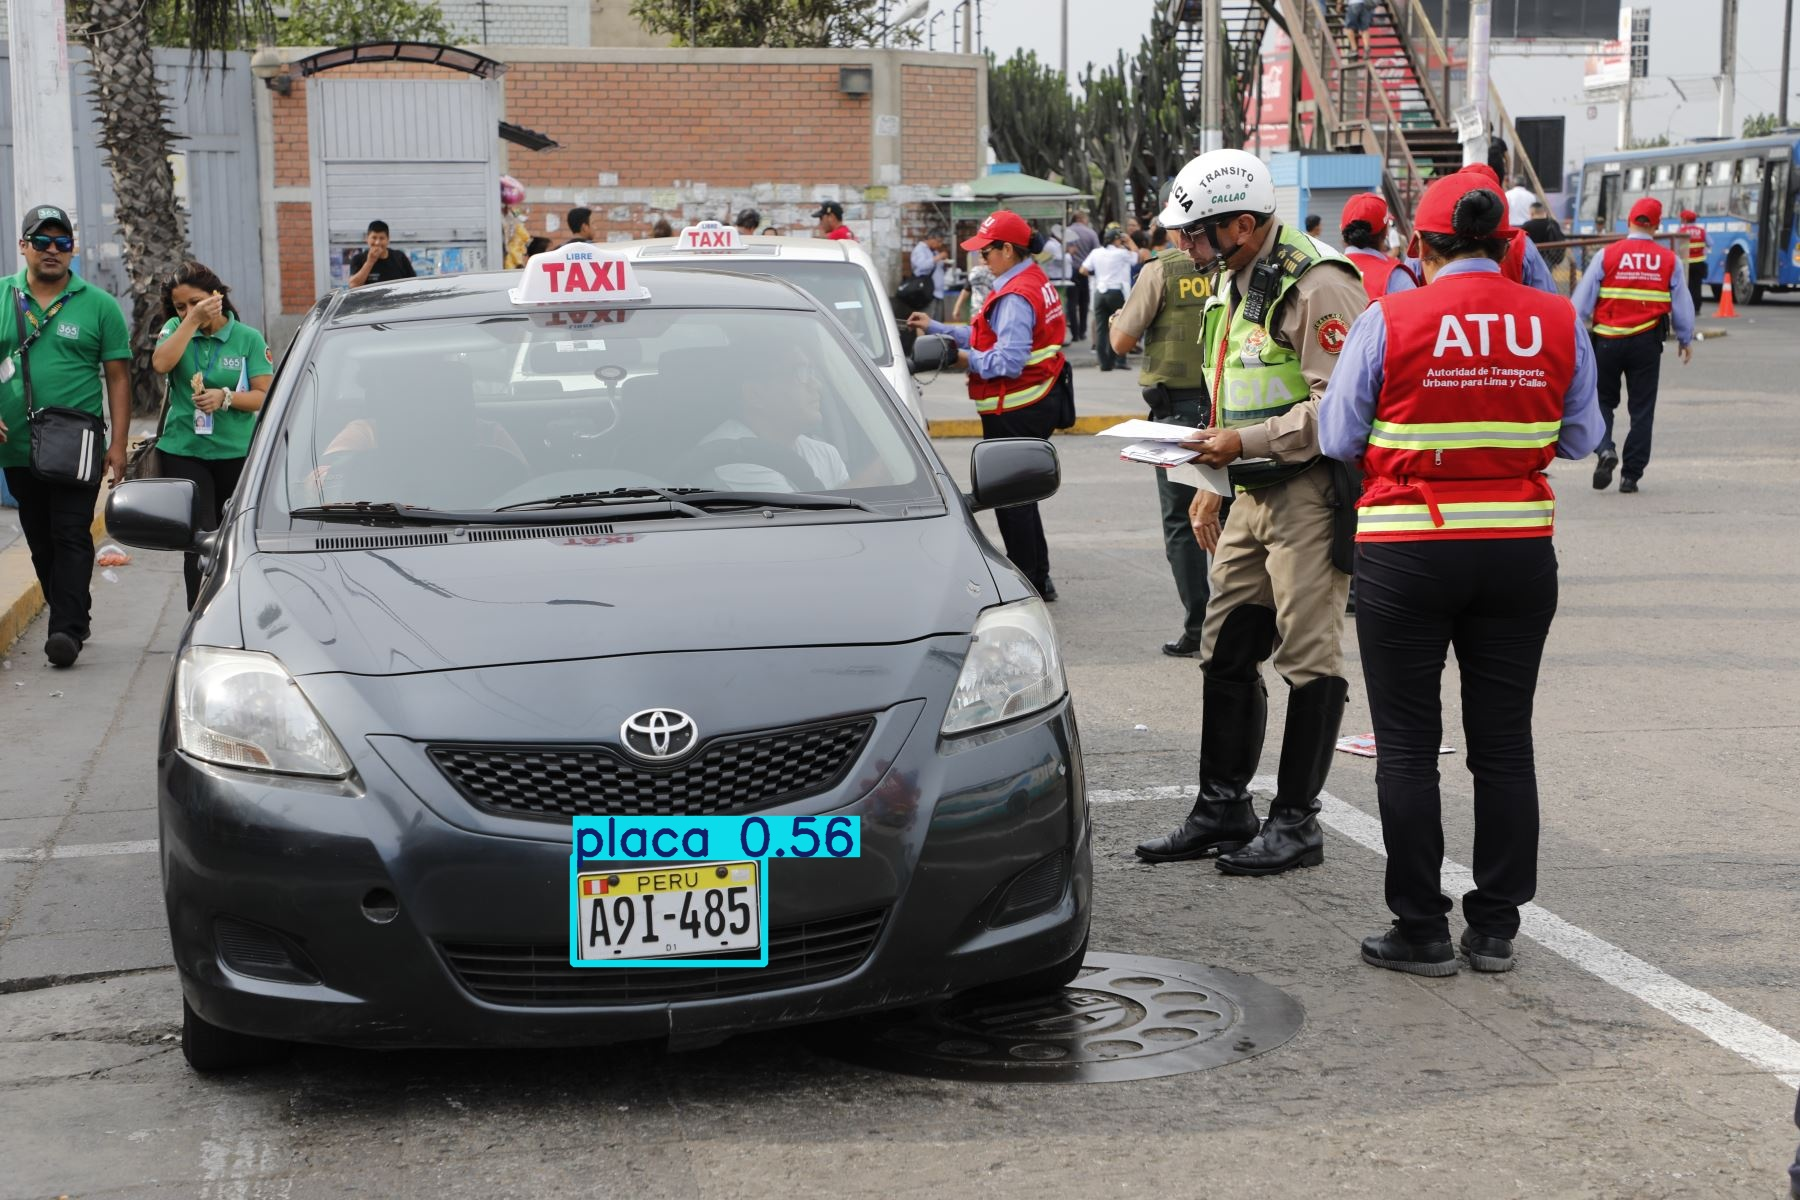

In [39]:
# 🖼️ Mostrar visualmente la imagen detectada con las cajas (bounding boxes)

from PIL import Image
import os

# 📂 Ruta donde Ultralytics guarda las predicciones por defecto
carpeta_resultados = "/content/runs/detect/predict"

# 🔎 Listar las imágenes generadas por YOLO (puedes mostrar más si lo deseas)
imagenes_detectadas = [f for f in os.listdir(carpeta_resultados) if f.endswith(('.jpg', '.png'))]

# ✅ Mostramos la primera imagen de la lista
if imagenes_detectadas:
    ruta_imagen = os.path.join(carpeta_resultados, imagenes_detectadas[0])
    imagen = Image.open(ruta_imagen)
    print(f"🖼️ Mostrando: {ruta_imagen}")
    display(imagen)
else:
    print("⚠️ No se encontraron imágenes detectadas. Asegúrate de haber ejecutado las predicciones.")
